In [ ]:
# 필요한 모듈 Import
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# 코드를 실행한 결과물 브라우저 표시
%matplotlib inline

import warnings

pd.set_option('mode.chained_assignment', None)

In [ ]:
# 필요한 데이터셋 Import
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# 먼저 성별그룹으로 나눈 뒤 나이 컬럼에 대하여 최소값을 구한다.

temp_ex = train.groupby("Sex")['Age'].min().to_frame().reset_index()

In [ ]:
temp_ex

,Sex,Age
0,female,0.75
1,male,0.42


In [ ]:
# 열 Age의 이름을 최소 나이로 바꾼다.

temp_ex = temp_ex.rename(columns={"Age": "min_age"})

In [ ]:
temp_ex

,Sex,min_age
0,female,0.75
1,male,0.42


In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# 결측치 확인
# 나이가 기재되어 있지 않은 승객 데이터 있음 => 승객 나이의 평균? 결측치 채우기 필요?
# Embarked (승선) => C / Q / S 3개의 승선지 있음
# Gender (성별) => 남성 / 여성
# Pclass (객실) => 1, 2, 3
# 범주형 변수 / 비정형 데이터 (텍스트) 처리

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
# Survived 열을 제공하지 않음을 알 수 있음!

test.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
190,1082,2,"Angle, Mr. William A",male,34.0,1,0,226875,26.0000,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
203,1095,2,"Quick, Miss. Winifred Vera",female,8.0,1,1,26360,26.0000,NaN,S
381,1273,3,"Foley, Mr. Joseph",male,26.0,0,0,330910,7.8792,NaN,Q
241,1133,2,"Christy, Mrs. (Alice Frances)",female,45.0,0,2,237789,30.0000,NaN,S


In [ ]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [ ]:
# 전체적인 데이터 기준으로 결측치 퍼센트 계산할 수 있는 함수

def cal_missing_percentage(df):
    # null인 데이터을 합쳐 내림차순으로 정렬
    total_data_count = df.isnull().sum().sort_values(ascending = False)

    # null인 데이터를 합쳐 내림차순으로 정렬 후 전체적인 데이터에 나누고 반올림해서 둘째 소수점 이하에 맞춰 반올림하여 나타냄
    percent_of_missing_data = round(df.isnull().sum().sort_values(ascending = False) / len(df)*100, 2)

    return pd.concat([total_data_count, percent_of_missing_data], axis=1, keys=['Total','Percent'])

In [ ]:
cal_missing_percentage(train)

,Total,Percent
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
PassengerId,0,0.00
Survived,0,0.00
Pclass,0,0.00
Name,0,0.00
Sex,0,0.00
SibSp,0,0.00
Parch,0,0.00


In [ ]:
cal_missing_percentage(test)

,Total,Percent
Cabin,327,78.23
Age,86,20.57
Fare,1,0.24
PassengerId,0,0.00
Pclass,0,0.00
Name,0,0.00
Sex,0,0.00
SibSp,0,0.00
Parch,0,0.00
Ticket,0,0.00


In [ ]:
# Embarked (승선)을 기준으로 전체적인 퍼센트 구하기

def percent_value_counts(df, feature):
    # 전체합이 1인 상태에서 모든 값의 비중을 나누어서 반환하기 위해 normalize = True
    percent_of_feature = pd.DataFrame(round(df.loc[:,feature].value_counts(dropna=False, normalize=True)*100, 2))

    total_feature = pd.DataFrame(df.loc[:,feature].value_counts(dropna=False))

    total_feature.columns = ["Total"]
    percent_of_feature.columns = ['Percent']
    return pd.concat([total_feature, percent_of_feature], axis = 1)

In [ ]:
percent_value_counts(train, 'Embarked')

,Total,Percent
S,644,72.28
C,168,18.86
Q,77,8.64
NaN,2,0.22


In [ ]:
# 위에 train.info를 참고하면 Embarked 열에 2개의 결측치를 확인할 수 있다.
# 확인해보면 티켓 가격으로 $80를 냈고 Pclass로 탑승했으며 성별은 여자인 것을 알 수 있다.

train[train.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


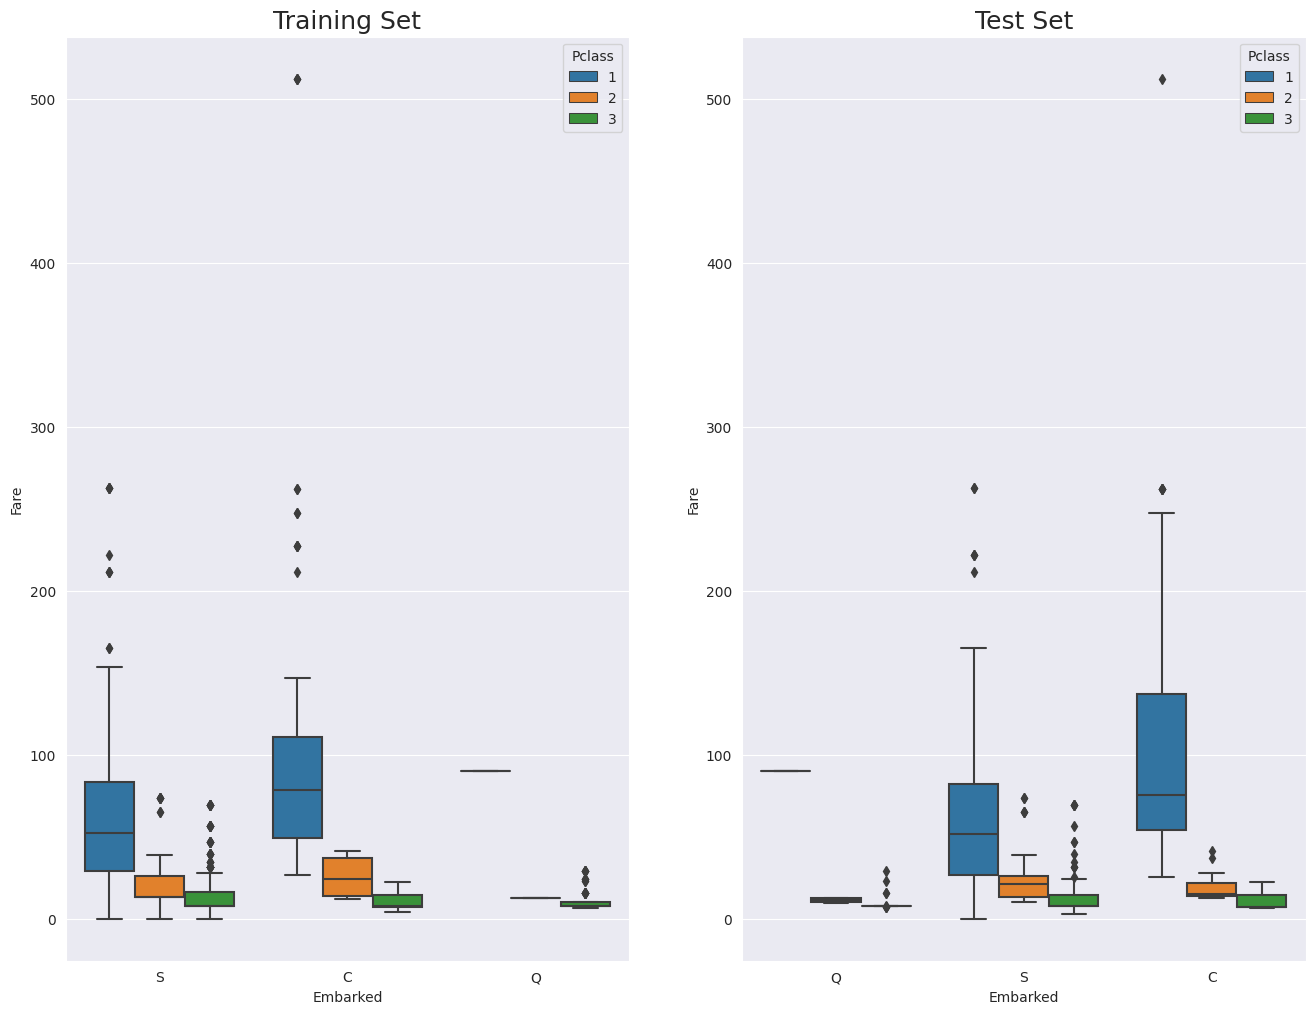

In [ ]:
# 티켓 가격이 클래스 탑승과 승선에 어떤 영향을 끼치는 지 알아보자.

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(16,12),ncols=2)
ax1 = sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=train, ax = ax[0]);
ax2 = sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=test, ax = ax[1]);
ax1.set_title("Training Set", fontsize = 18)
ax2.set_title('Test Set',  fontsize = 18)

fig.show()

In [ ]:
# $80달러의 Pclass 1의 탑승이 대부분 C Embarked에 승선했기 때문에 결측치를 C로 입력

train.Embarked.fillna("C", inplace=True)

In [ ]:
print("Train Cabin missing: " + str(train.Cabin.isnull().sum() / len(train.Cabin)))
print("Test Cabin missing: " + str(test.Cabin.isnull().sum() / len(test.Cabin)))

# Cabin 열의 데이터 손실률은 77~78%
# 크게 두 가지의 선택을 할 수 있다. Cabin 열을 제거를 하거나
# 객실 기록을 가진 승객들이 다른 사람들보다 사회적으로 경제가 더 부유했다고 생각할 수 있다.
# 그래서 객실 기록이 짐을 실을 때 남겼을 거라 고려할 수 있다.

Train Cabin missing: 0.7710437710437711
Test Cabin missing: 0.7822966507177034


In [ ]:
survivers = train.Survived

train.drop(["Survived"], axis = 1, inplace=True)

all_data = pd.concat([train, test], ignore_index=False)

all_data.Cabin.fillna("N", inplace=True)

In [ ]:
all_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,N,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,N,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,N,S


In [ ]:
# Cabin(객실)을 살펴보면 영문 알파벳 한문자 다음에 숫자로 시작하는 형태이다.
# 하지만 몇몇의 승객은 자신의 이름을 기호로 쓴 후에 예약한 경우도 있다.
# 이를 잘 구분해서 숫자보다는 문자에 중요성을 알고 분석해야 한다.

# 제일 앞의 문자를 출력한다.
all_data.Cabin = [i[0] for i in all_data.Cabin]

In [ ]:
all_data.Cabin

0      N
1      C
2      N
3      C
4      N
      ..
413    N
414    C
415    N
416    N
417    N
Name: Cabin, Length: 1309, dtype: object

In [ ]:
# 기존에 만들었던 value_counts 함수를 이용해 전체 개수를 파악한다.

percent_value_counts(all_data, "Cabin")

,Total,Percent
N,1014,77.46
C,94,7.18
B,65,4.97
D,46,3.51
E,41,3.13
A,22,1.68
F,21,1.60
G,5,0.38
T,1,0.08


In [ ]:
# 객실을 기준으로 티켓 가격의 평균을 구해본다.

all_data.groupby("Cabin")['Fare'].mean().sort_values()

Cabin
G     14.205000
F     18.079367
N     19.132707
T     35.500000
A     41.244314
D     53.007339
E     54.564634
C    107.926598
B    122.383078
Name: Fare, dtype: float64

In [ ]:
def cabin_estimator(i):
    a = 0

    if i < 16:
        a = "G"
    elif i >= 16 and i < 27:
        a = "F"
    elif i >= 27 and i < 38:
        a = "T"
    elif i >= 38 and i < 47:
        a = "A"
    elif i >= 47 and i < 53:
        a = "E"
    elif i >= 53 and i < 54:
        a = "D"
    elif i >= 54 and i < 116:
        a = 'C'
    else:
        a = "B"

    return a

In [ ]:
Cabin_with_N = all_data[all_data.Cabin == "N"]

Cabin_without_N = all_data[all_data.Cabin != "N"]

In [ ]:
# Cabin(객실)이 N으로 되어 있는 데이터를 cabin_estimator 함수를 이용해 재부여
Cabin_with_N['Cabin'] = Cabin_with_N.Fare.apply(lambda x: cabin_estimator(x))

all_data = pd.concat([Cabin_with_N, Cabin_without_N], axis=0)

# PaseengerId를 통해 정렬 (train set과 test set 나누기 위해)
all_data.sort_values(by = 'PassengerId', inplace=True)

# train / test set 나눔
train = all_data[:891]

test = all_data[891:]

# 삭제한 train Survived 행 추가
train['Survived'] = survivers

In [ ]:
# 티켓 가격이 결측치인 행 추출
# Pclass가 3이고 성별은 남성 승선지는 S인걸 알 수 있음.

test[test.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,B,S


In [ ]:
missing_value = test[(test.Pclass == 3) &
                     (test.Embarked == "S") &
                     (test.Sex == "male")].Fare.mean()

missing_value

12.718872000000001

In [ ]:
# 결측치를 가진 데이터에 해당하는 평균 값을 찾아내서 부여
test.Fare.fillna(missing_value, inplace=True)

In [ ]:
print ("Train age missing value: " + str((train.Age.isnull().sum() / len(train)) * 100) + str("%"))
print ("Test age missing value: " + str((test.Age.isnull().sum() / len(test)) * 100) + str("%"))

# train set과 test set 둘다 나이에 관한 데이터가 20%의 손실률을 기록하고 있다.
# 연령 변수는 생존율과 엄청난 연관을 가지고 있으므로 중앙값, 평균으로 값을 채워넣어야 한다.

Train age missing value: 19.865319865319865%
Test age missing value: 20.574162679425836%


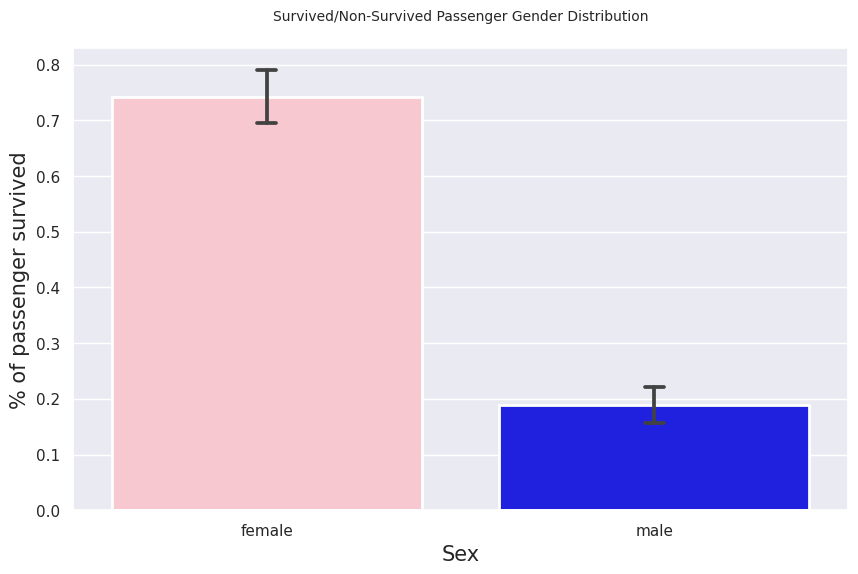

In [ ]:
# 성별에 따른 생존률을 막대그래프로 시각화해보자.

import seaborn as sns
pal = {'male' : "blue", 'female' : "Pink"}
sns.set(style="darkgrid")
plt.subplots(figsize = (10,6))
ax = sns.barplot(x = "Sex",
                 y = "Survived",
                 data=train,
                 palette = pal,
                 linewidth=2,
                 order = ['female','male'],
                 capsize = .05,
                )

plt.title("Survived/Non-Survived Passenger Gender Distribution", fontsize = 10,loc = 'center', pad = 20)
plt.ylabel("% of passenger survived", fontsize = 15, )
plt.xlabel("Sex",fontsize = 15);

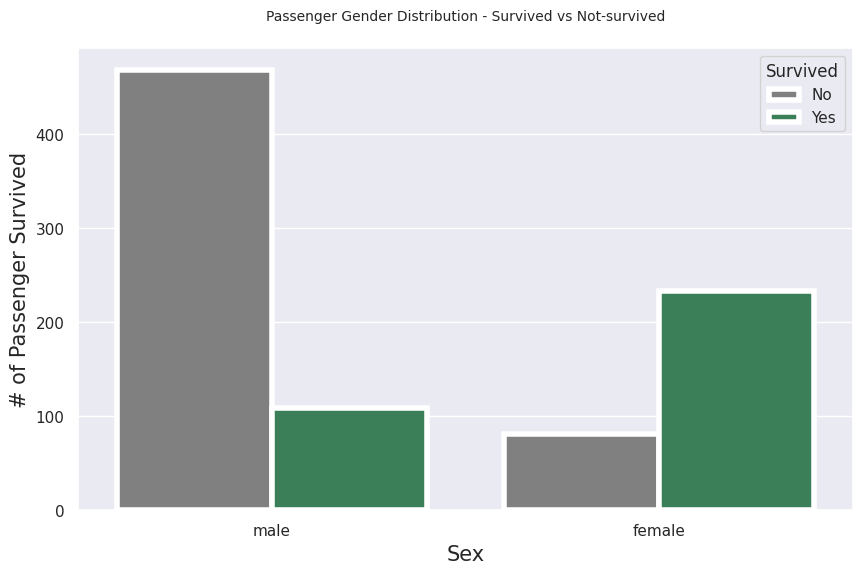

In [ ]:
# 성별 안에서도 생존자와 비생존자를 고유한 값(value)의 개수를 세어 그래프로 표현

pal = {1:"seagreen", 0:"gray"}
sns.set(style="darkgrid")
plt.subplots(figsize = (10,6))
ax = sns.countplot(x = "Sex",
                   hue="Survived",
                   data = train,
                   linewidth=4,
                   palette = pal
)

plt.title("Passenger Gender Distribution - Survived vs Not-survived", fontsize = 10, pad=20)
plt.xlabel("Sex", fontsize = 15);
plt.ylabel("# of Passenger Survived", fontsize = 15)

leg = ax.get_legend()
leg.set_title("Survived")
legs = leg.texts
legs[0].set_text("No")
legs[1].set_text("Yes")
plt.show()

In [ ]:
# Pclass에 따른 생존자 비율을 확인해보자

temp_pclass = train[['Pclass', 'Survived', 'PassengerId']].groupby(['Pclass', 'Survived']).count().reset_index()

temp_pclass

,Pclass,Survived,PassengerId
0,1,0,80
1,1,1,136
2,2,0,97
3,2,1,87
4,3,0,372
5,3,1,119


In [ ]:
temp_df = pd.pivot_table(temp_pclass, values = 'PassengerId', index = 'Pclass', columns = 'Survived')

temp_df

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [ ]:
names = ['No', 'Yes']
temp_df.columns = names

temp_df

,No,Yes
Pclass,,
1,80,136
2,97,87
3,372,119


In [ ]:
var = [0, 1, 2]

total = [i + j for i, j in zip(temp_df['No'], temp_df['Yes'])]
No = [i / j * 100 for i, j in zip(temp_df['No'], total)]
Yes = [i / j * 100 for i, j in zip(temp_df['Yes'], total)]

print(total)
print(No)
print(Yes)

[216, 184, 491]
[37.03703703703704, 52.71739130434783, 75.76374745417516]
[62.96296296296296, 47.28260869565217, 24.236252545824847]


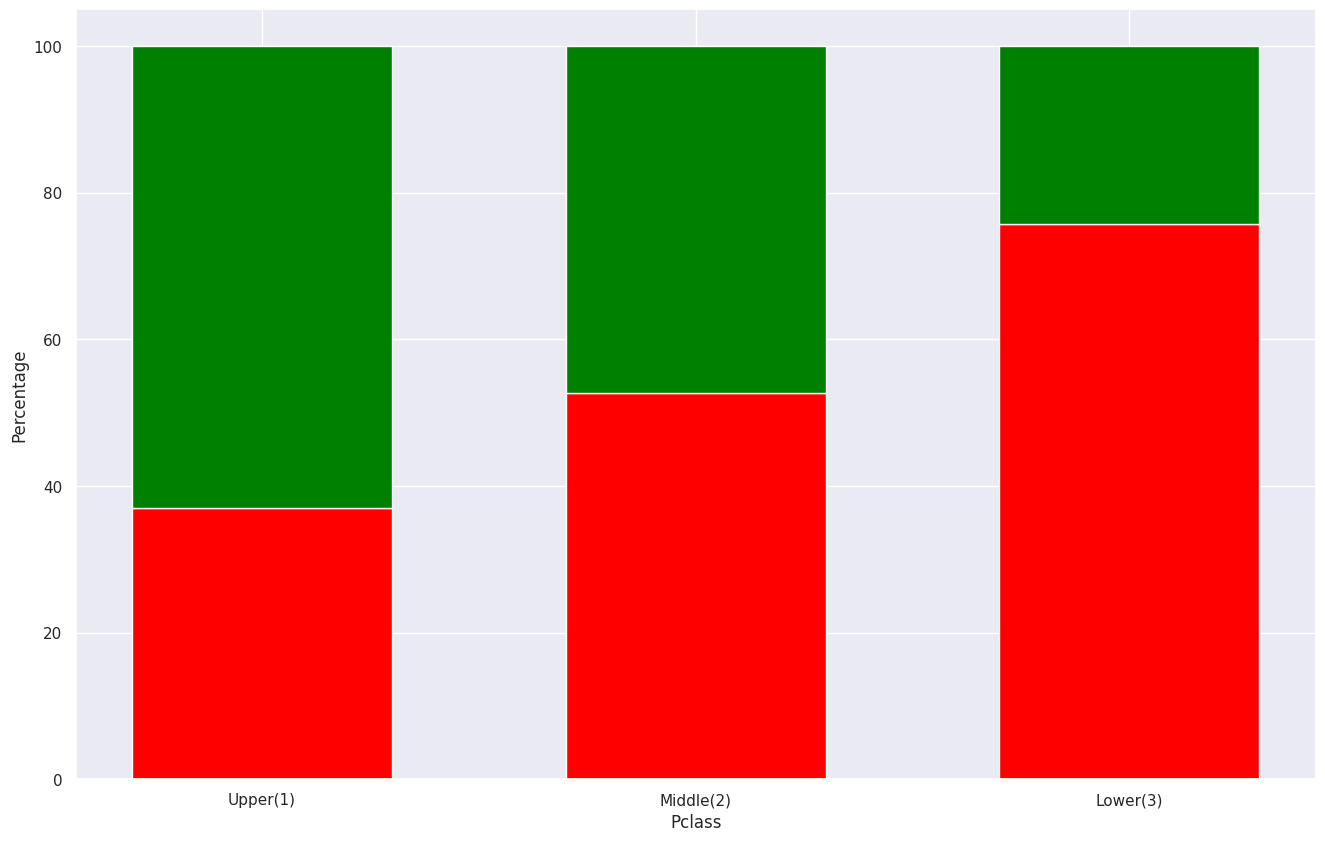

In [ ]:
plt.subplots(figsize = (16,10))
barWidth = 0.60
names = ('Upper(1)', 'Middle(2)', 'Lower(3)')

plt.bar(var, No, color='Red', edgecolor='white', width=barWidth)
plt.bar(var, Yes, bottom=No, color='Green', edgecolor='white', width=barWidth)

plt.xticks(var, names)
plt.xlabel("Pclass")
plt.ylabel('Percentage')

plt.show()

# 상위 클래스 일수록 더 많은 사람들이 살아남았음을 알 수 있음.

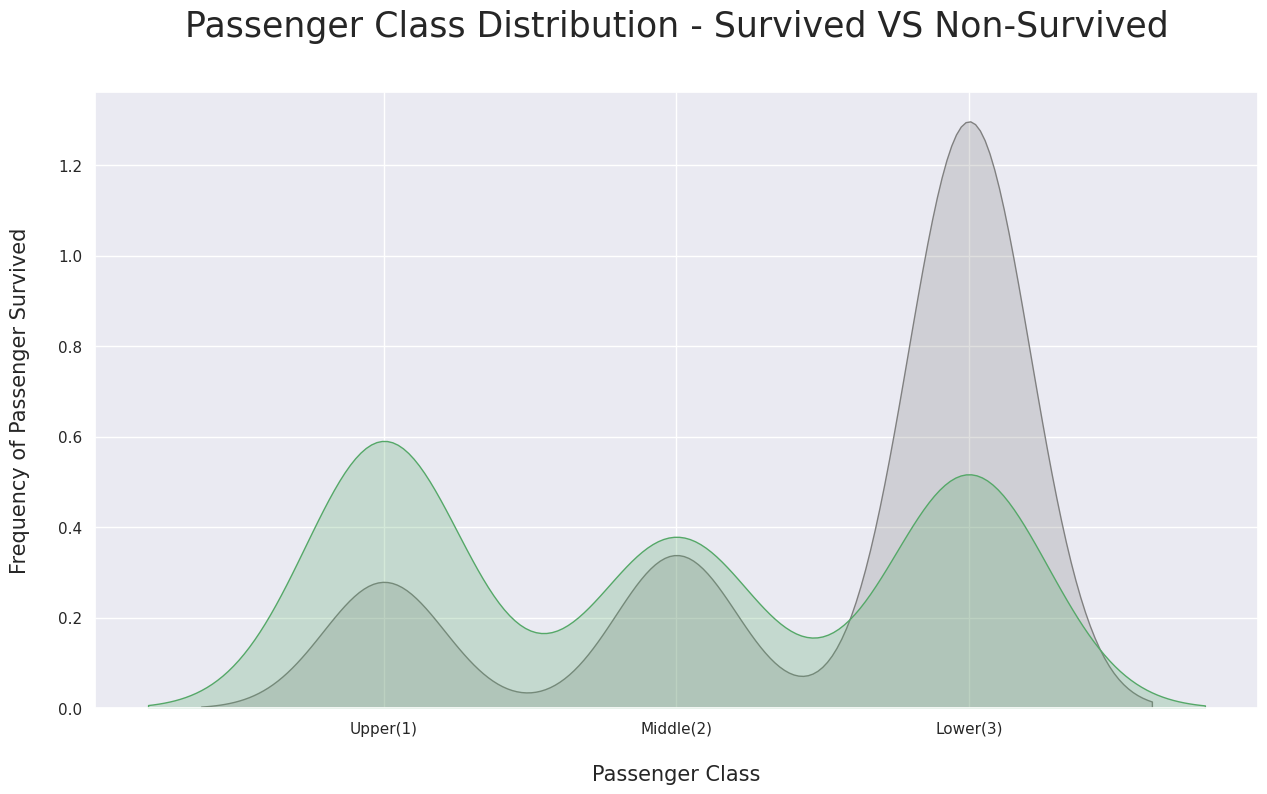

In [ ]:
fig = plt.figure(figsize=(15,8),)

# kdeplot은 커널 밀도 추정으로 절대량이 아닌 비율(상대량)을 시각화한다.

ax = sns.kdeplot(train.Pclass[train.Survived == 0] ,
               color='gray',
               fill=True,
               label='not survived')
ax = sns.kdeplot(train.loc[(train['Survived'] == 1),'Pclass'] ,
               color='g',
               fill=True,
               label='survived',
              )

plt.title('Passenger Class Distribution - Survived VS Non-Survived', fontsize = 25, pad = 40)
plt.ylabel("Frequency of Passenger Survived", fontsize = 15, labelpad = 20)
plt.xlabel("Passenger Class", fontsize = 15,labelpad =20)
labels = ['Upper(1)', 'Middle(2)', 'Lower(3)']
plt.xticks(sorted(train.Pclass.unique()), labels);

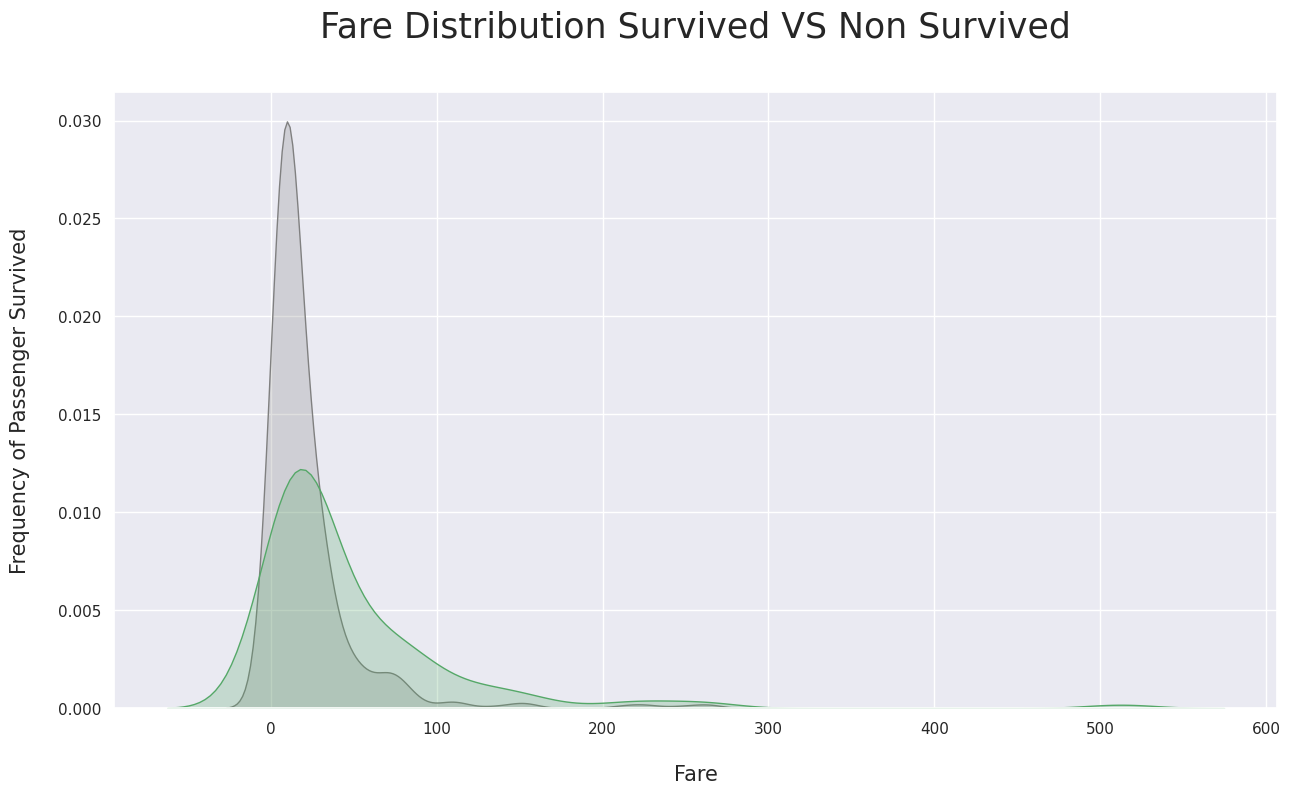

In [ ]:
# 위에는 클래스에 따른 비율이였다면 이 그래프는 금액에 따른 생존율 비율을 나타낸다.

fig = plt.figure(figsize=(15,8),)
ax = sns.kdeplot(train.loc[(train['Survived'] == 0),'Fare'],
                 color='gray',
                 fill=True,
                 label='not survived')
ax = sns.kdeplot(train.loc[(train['Survived'] == 1),'Fare'],
                 color='g',
                 fill=True,
                 label='survived')

plt.title('Fare Distribution Survived VS Non Survived', fontsize = 25, pad = 40)
plt.ylabel("Frequency of Passenger Survived", fontsize = 15, labelpad = 20)
plt.xlabel("Fare", fontsize = 15, labelpad = 20);

# $300에 가까워 질 수록 회색의 음영이 점점 사라지는 걸 알 수 있다.
# $280 이상 티켓 가격을 낸 고객을 알아보자.

In [ ]:
train[train.Fare > 280]

# 티켓 가격이 512는 이상치로 보인다. 제거?

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
258,259,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,B,C,1
679,680,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B,C,1
737,738,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B,C,1


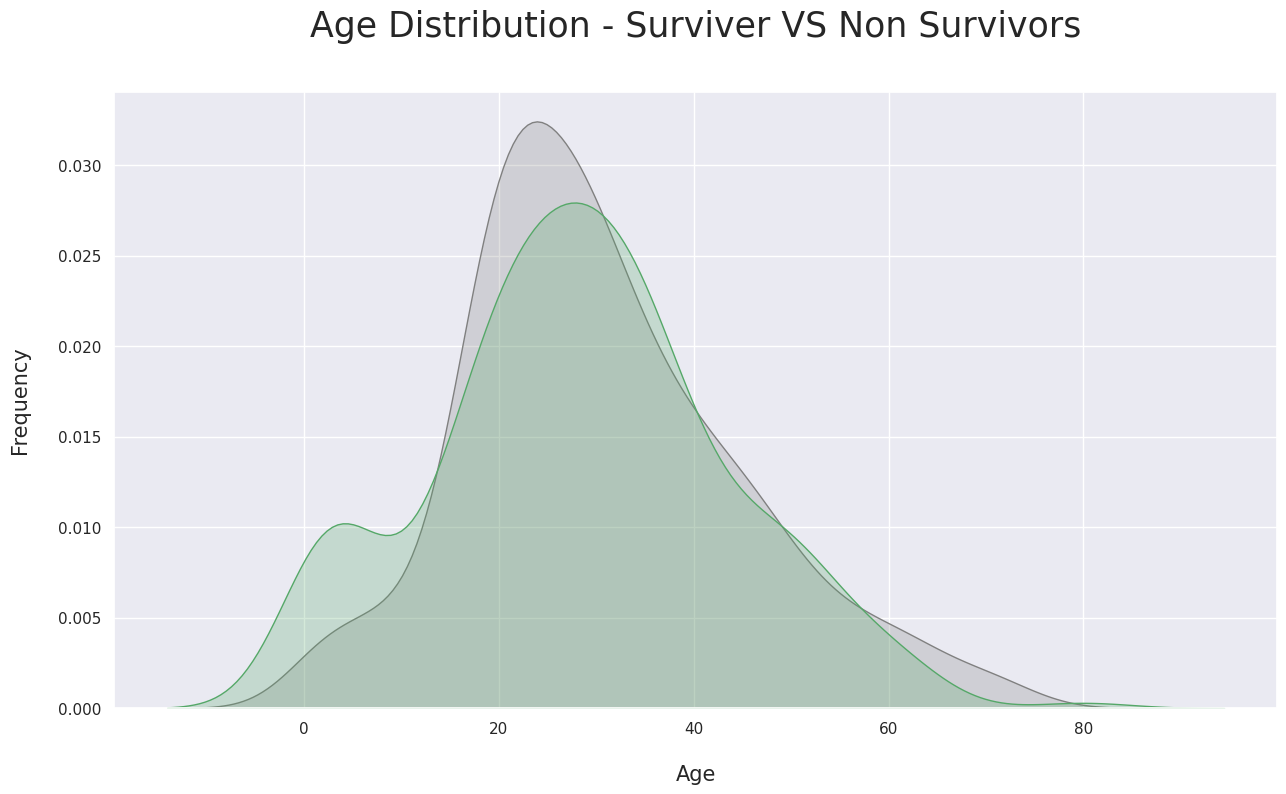

In [ ]:
# 나이에 따른 생존율 그래프

fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(train.loc[(train['Survived'] == 0),'Age'],
               color='gray',
               fill=True,
               label='not survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Age'],
               color='g',
               fill=True,
               label='survived')

plt.title('Age Distribution - Surviver VS Non Survivors', fontsize = 25, pad = 40)
plt.xlabel("Age", fontsize = 15, labelpad = 20)
plt.ylabel('Frequency', fontsize = 15, labelpad= 20);

# 그래프를 살펴보면 나이어린 영유아나 아이들을 우선시함을 알 수 있다.

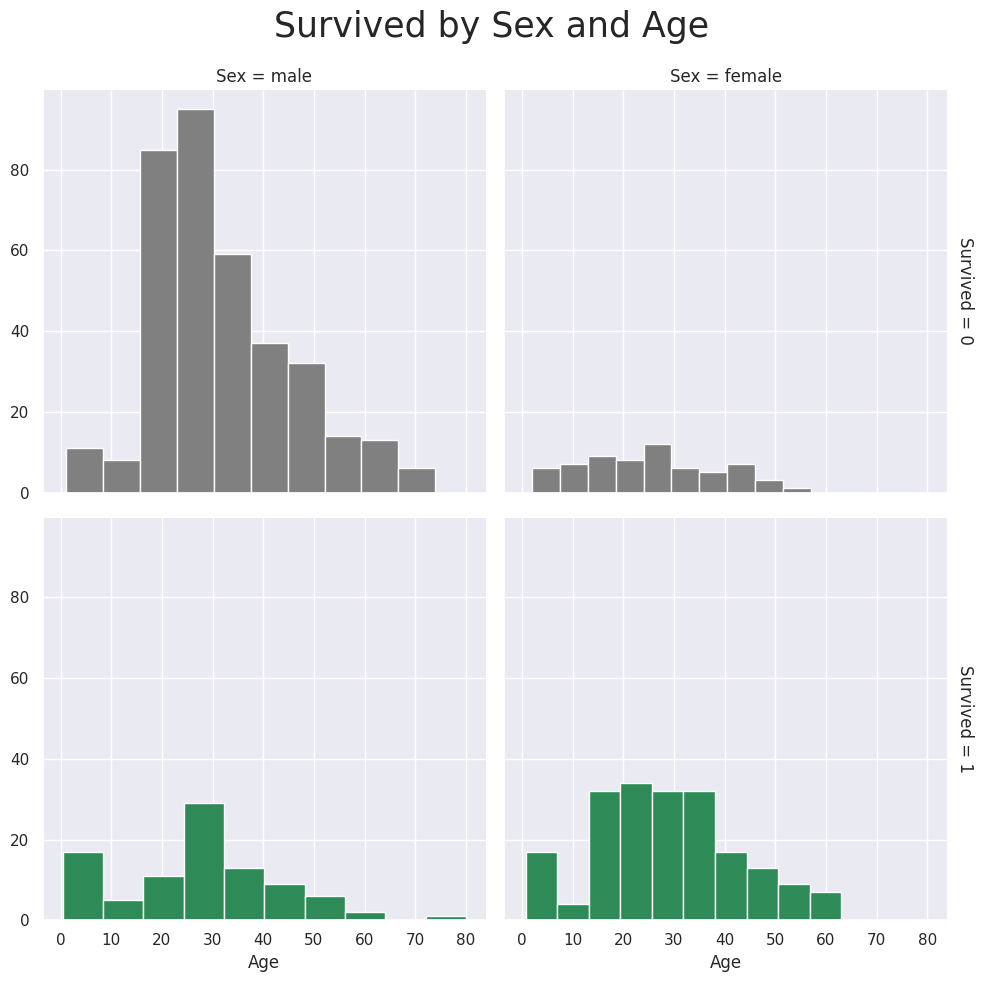

In [ ]:
# 다양한 범주형 값을 가지는 데이터를 시각화 하는데 좋은 방법 FacetGrid(패싯그리드)

pal = {1 : "seagreen", 0 : "gray"}
graph = sns.FacetGrid(train,
                  col="Sex",
                  height=5,
                  row="Survived",
                  margin_titles=True,
                  hue = "Survived",
                  palette=pal)

graph = graph.map(plt.hist, "Age", edgecolor = 'white');
graph.fig.suptitle("Survived by Sex and Age", size = 25)

# 서브플롯간의 간격 조절
plt.subplots_adjust(top=0.90)

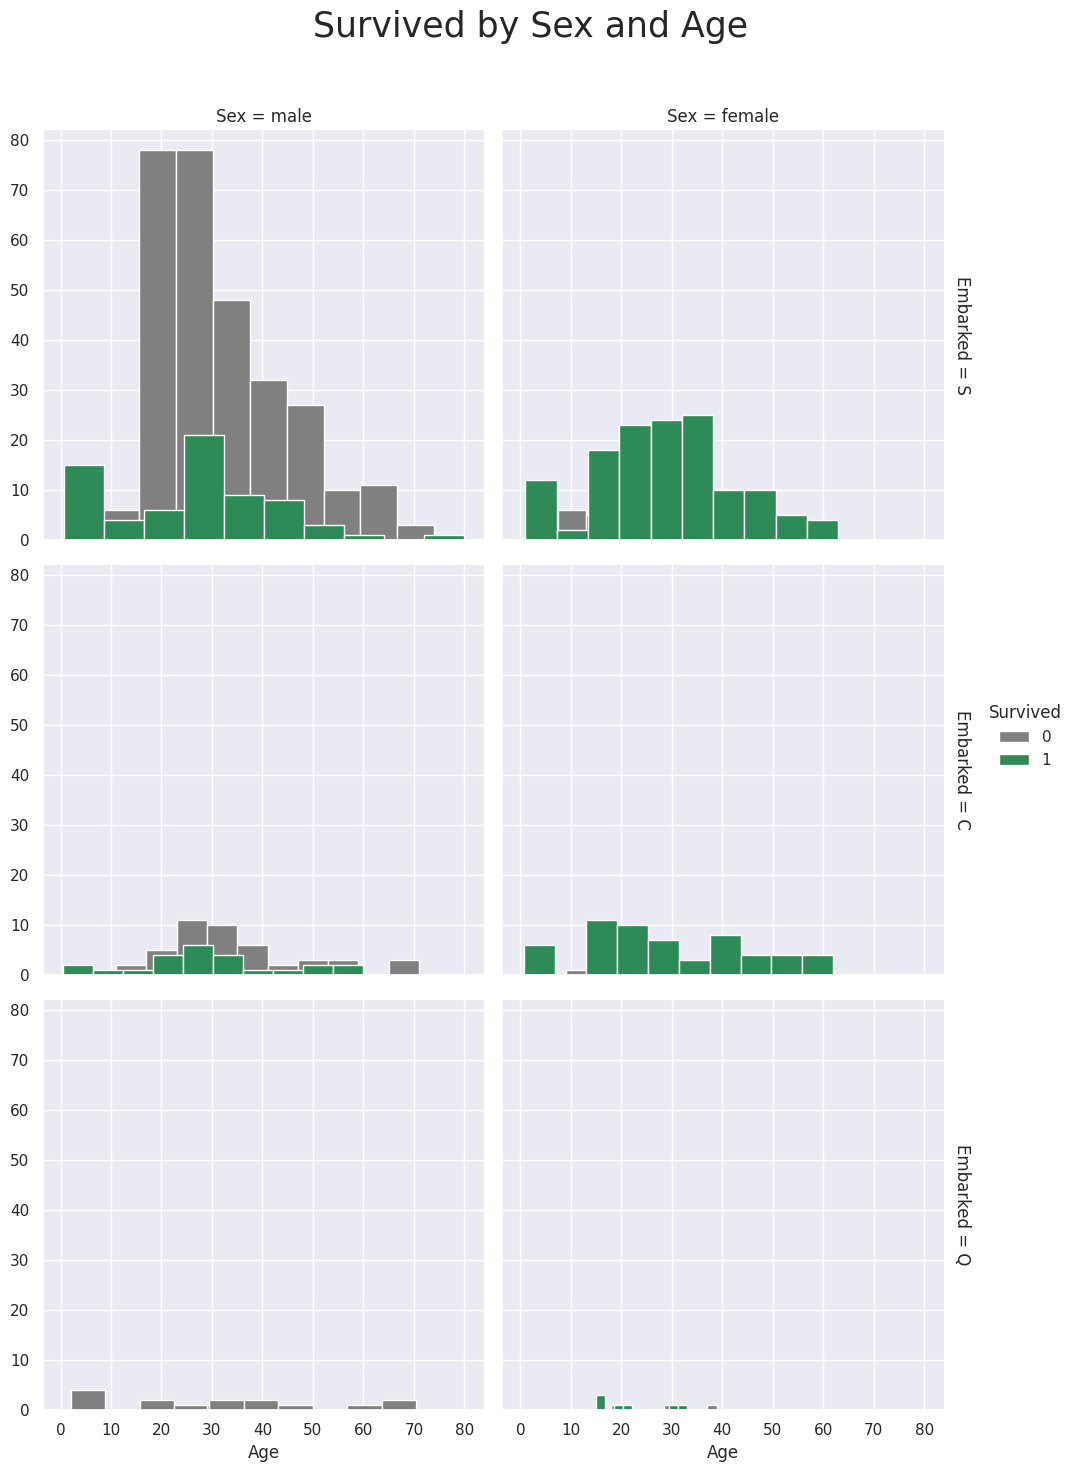

In [ ]:
graph = sns.FacetGrid(train,
                  height=5,
                  col="Sex",
                  row="Embarked",
                  margin_titles=True,
                  hue = "Survived",
                  palette = pal)

graph = graph.map(plt.hist, "Age", edgecolor = 'white').add_legend();
graph.fig.suptitle("Survived by Sex and Age", size = 25)
plt.subplots_adjust(top=0.90)

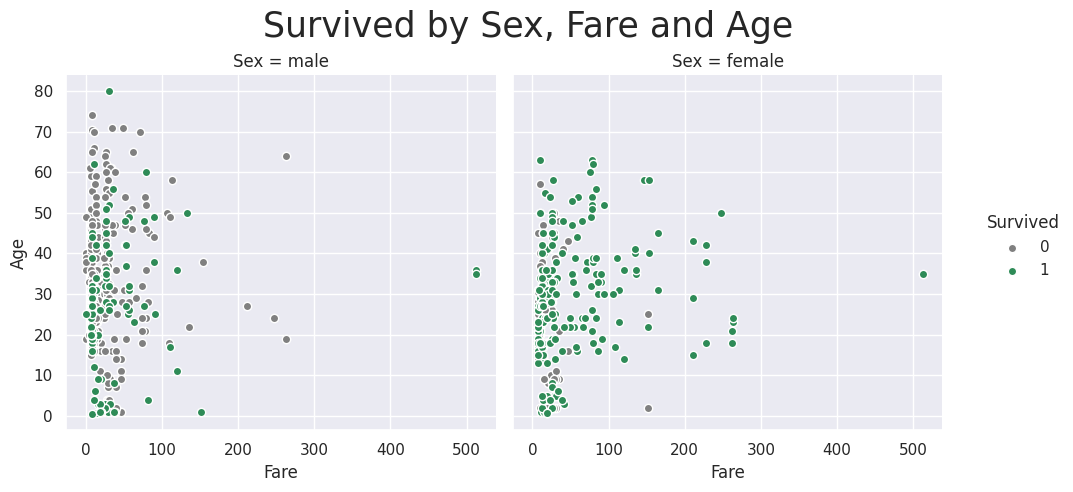

In [ ]:
graph = sns.FacetGrid(train,
                  height=5,
                  hue="Survived",
                  col ="Sex",
                  margin_titles=True,
                  palette=pal)

graph.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()
graph.fig.suptitle("Survived by Sex, Fare and Age", size = 25)
plt.subplots_adjust(top=0.85)

In [ ]:
train['Sex'] = train.Sex.apply(lambda x: 0 if x == "female" else 1)
test['Sex'] = test.Sex.apply(lambda x: 0 if x == "female" else 1)

print(train['Sex'])
print(test['Sex'])

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64
0      1
1      0
2      1
3      1
4      0
      ..
413    1
414    0
415    1
416    1
417    1
Name: Sex, Length: 418, dtype: int64


In [ ]:
train.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,0.383838
std,257.353842,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [ ]:
train.describe(include =['O'])

,Name,Ticket,Cabin,Embarked
count,891,891,891,891
unique,891,681,8,3
top,"Braund, Mr. Owen Harris",347082,G,S
freq,1,7,464,644


In [ ]:
survived_summary = train.groupby("Survived")
survived_summary.mean(numeric_only=True).reset_index()

,Survived,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,447.016393,2.531876,0.852459,30.626179,0.553734,0.329690,22.117887
1,1,444.368421,1.950292,0.318713,28.343690,0.473684,0.464912,48.395408


In [ ]:
survived_summary = train.groupby("Sex")
survived_summary.mean(numeric_only=True).reset_index()

,Sex,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
0,0,431.028662,2.159236,27.915709,0.694268,0.649682,44.479818,0.742038
1,1,454.147314,2.389948,30.726645,0.429809,0.235702,25.523893,0.188908


In [ ]:
survived_summary = train.groupby("Pclass")
survived_summary.mean(numeric_only=True).reset_index()

,Pclass,PassengerId,Sex,Age,SibSp,Parch,Fare,Survived
0,1,461.597222,0.564815,38.233441,0.416667,0.356481,84.154687,0.629630
1,2,445.956522,0.586957,29.877630,0.402174,0.380435,20.662183,0.472826
2,3,439.154786,0.706721,25.140620,0.615071,0.393075,13.675550,0.242363


In [ ]:
pd.DataFrame(abs(train.corr(numeric_only=True)['Survived']).sort_values(ascending = False))

# 성별과 객실이 생존여부에 가장 영향이 미치는 것을 알 수 있다.

,Survived
Survived,1.000000
Sex,0.543351
Pclass,0.338481
Fare,0.257307
Parch,0.081629
Age,0.077221
SibSp,0.035322
PassengerId,0.005007


Text(0.5, 1.03, 'Correlations Among Features')

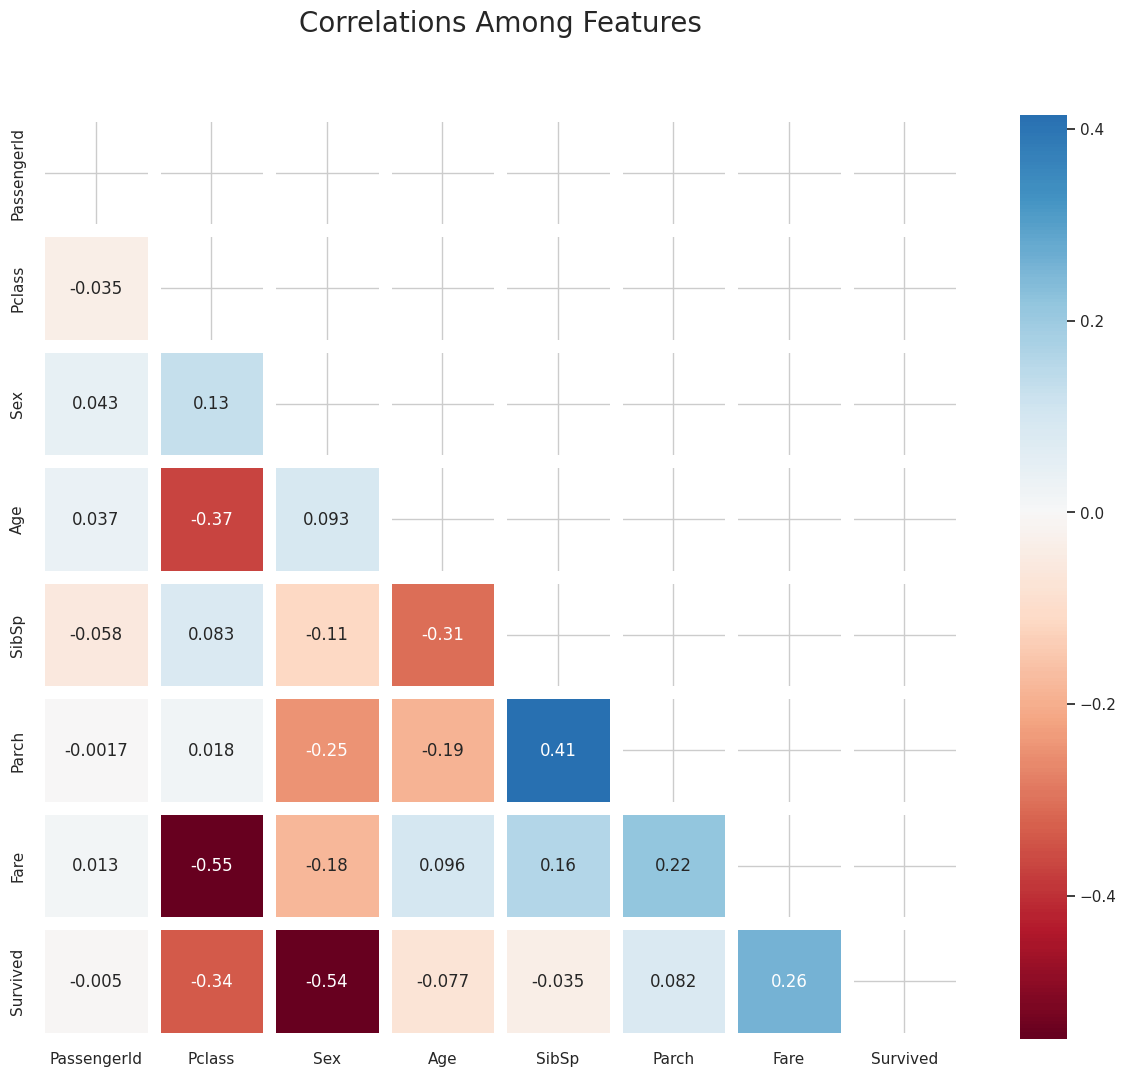

In [ ]:
import numpy as np

mask = np.zeros_like(train.corr(numeric_only=True), dtype=bool)
mask[np.triu_indices_from(mask)] = True

sns.set_style("whitegrid")
plt.subplots(figsize = (15, 12))
sns.heatmap(train.corr(numeric_only=True),
            annot = True,
            mask = mask,
            cmap = 'RdBu',
            linewidths = 9,
            linecolor = 'white',
            fmt = '.2g',
            center = 0,
            square = True)
plt.title("Correlations Among Features", y = 1.03, fontsize = 20, pad = 40)

In [ ]:
# 등급이 매겨진 운임과 생존자들 사이에는 다소 강한 관계가 형성되어있음을 알 수 있다.
# 이 뜻은 돈을 더 지불한 승객이 생존할 확률이 높다는 것을 보여주기도 한다. 또 다른 상관관계인 Pclass X Fare 관계가
# 등급이 더 높은 승객이 더 많이 지불됐다는 부분을 설명하기에 돈을 더 많이 지불한 경우 생존확률이 올라가는 이유를 더 받침해줍니다.
# 가장 중요한 성별 변수의 -0.54가 정확한 어떤 부분을 설명하는데 있어서 충분치 않기 때문에 유의미한 결과를 다시 살펴보아야 한다.

# 1. 생존한 승객과 생존하지 못한 승객의 평균 성별에 대한 유의미한 차이가 있는가?
# 2. 남성과 여성 승객의 생존율에 대한 차이가 유의미하게 있는가?
'''
귀무가설과 대립가설을 통해 최종 목표를 찾고 이해해야 한다. 종속변수와 독립변수를 통해 '살아남음'이 가장 중요하기 때문에 이를 중심으로 가설을 설정해야 한다.

귀무가설(H0): 남성 승객과 여성 승객의 생존율에 차이가 없거나 생존율에서 남성 승객과 여성 승객의 평균 차이는 0이다.
대립가설(H1): 남성 승객과 여성 승객의 생존율에 차이가 있거나, 생존율에서 남성과 여성 승객의 평균 생존율 차이는 0이 아니다.

두 개의 변수를 통해 검정이 되어야 하기 때문에 현재 우리는 표준편차를 모르고 n(전체 변수)가 작기 떄문에 t-분포를 사용한다.
'''

"\n귀무가설과 대립가설을 통해 최종 목표를 찾고 이해해야 한다. 종속변수와 독립변수를 통해 '살아남음'이 가장 중요하기 때문에 이를 중심으로 가설을 설정해야 한다.\n\n귀무가설(H0): 남성 승객과 여성 승객의 생존율에 차이가 없거나 생존율에서 남성 승객과 여성 승객의 평균 차이는 0이다.\n대립가설(H1): 남성 승객과 여성 승객의 생존율에 차이가 있거나, 생존율에서 남성과 여성 승객의 평균 생존율 차이는 0이 아니다.\n\n두 개의 변수를 통해 검정이 되어야 하기 때문에 현재 우리는 표준편차를 모르고 n(전체 변수)가 작기 떄문에 t-분포를 사용한다.\n"

In [ ]:
# 남성 평균
male_mean = train[train['Sex'] == 1].Survived.mean()

# 여성 평균
female_mean = train[train['Sex'] == 0].Survived.mean()

print ("Male survival mean: " + str(male_mean))
print ("female survival mean: " + str(female_mean))

print ("The mean difference between male and female survival rate: " + str(female_mean - male_mean))

Male survival mean: 0.18890814558058924
female survival mean: 0.7420382165605095
The mean difference between male and female survival rate: 0.5531300709799203


In [ ]:
'''
이 두 가지 평균이 모집단의 평균은 아니다. 모집단의 평균을 알기 위해서는 전체에 해당하는 모든 데이터를 파악하고 평균을 내야 하기 때문에 사실 불가능에 가깝다.
그러기 위해서는 우리가 가지고 있는 데이터가 일부임에도 지속적으로 훈련시키고 표본을 더하고 평균을 추가할 수록 정확해지기 때문에
무작위 표본을 추출하도록 한다.
'''

'\n이 두 가지 평균이 모집단의 평균은 아니다. 모집단의 평균을 알기 위해서는 전체에 해당하는 모든 데이터를 파악하고 평균을 내야 하기 때문에 사실 불가능에 가깝다.\n그러기 위해서는 우리가 가지고 있는 데이터가 일부임에도 지속적으로 훈련시키고 표본을 더하고 평균을 추가할 수록 정확해지기 때문에\n무작위 표본을 추출하도록 한다.\n'

In [ ]:
import random
male = train[train['Sex'] == 1]
female = train[train['Sex'] == 0]

m_mean_samples = []
f_mean_samples = []

for i in range(50):
  m_mean_samples.append(np.mean(random.sample(list(male['Survived']), 50, )))
  f_mean_samples.append(np.mean(random.sample(list(female['Survived']), 50, )))

print(f"Male mean sample mean: {round(np.mean(m_mean_samples), 2)}")
print(f"Female mean sample mean: {round(np.mean(f_mean_samples), 2)}")
print(f"Difference between male and female mean sample mean: {round(np.mean(f_mean_samples) - np.mean(m_mean_samples), 2)}")

Male mean sample mean: 0.18
Female mean sample mean: 0.75
Difference between male and female mean sample mean: 0.56


In [ ]:
'''
이를 통해 귀무가설, 대립가설
H0: 남성 평균이 여성 평균보다 크거나 작다.
H1: 남성 평균은 여성 평균보다 작다.
를 알 수 있다.
'''

'\n이를 통해 귀무가설, 대립가설\nH0: 남성 평균이 여성 평균보다 크거나 작다.\nH1: 남성 평균은 여성 평균보다 작다.\n를 알 수 있다.\n'

In [ ]:
train['name_length'] = [len(i) for i in train.Name]
test['name_length'] = [len(i) for i in test.Name]

print(train['name_length'])
print(test['name_length'])

def name_length_group(size):
    a = ''
    if (size <=20):
        a = 'short'
    elif (size <=35):
        a = 'medium'
    elif (size <=45):
        a = 'good'
    else:
        a = 'long'
    return a


train['nLength_group'] = train['name_length'].map(name_length_group)
test['nLength_group'] = test['name_length'].map(name_length_group)

0      23
1      51
2      22
3      44
4      24
       ..
886    21
887    28
888    40
889    21
890    19
Name: name_length, Length: 891, dtype: int64
0      16
1      32
2      25
3      16
4      44
       ..
413    18
414    28
415    28
416    19
417    24
Name: name_length, Length: 418, dtype: int64


In [ ]:
train["title"] = [i.split('.')[0] for i in train.Name]
train["title"] = [i.split(',')[1] for i in train.title]

print(train["title"])

0         Mr
1        Mrs
2       Miss
3        Mrs
4         Mr
       ...  
886      Rev
887     Miss
888     Miss
889       Mr
890       Mr
Name: title, Length: 891, dtype: object


In [ ]:
print(train.title.unique())

[' Mr' ' Mrs' ' Miss' ' Master' ' Don' ' Rev' ' Dr' ' Mme' ' Ms' ' Major'
 ' Lady' ' Sir' ' Mlle' ' Col' ' Capt' ' the Countess' ' Jonkheer']


In [ ]:
train.title = train.title.apply(lambda x: x.strip())

print(train.title)

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: title, Length: 891, dtype: object


In [ ]:
test['title'] = [i.split('.')[0].split(',')[1].strip() for i in test.Name]

print(test['title'])

0          Mr
1         Mrs
2          Mr
3          Mr
4         Mrs
        ...  
413        Mr
414      Dona
415        Mr
416        Mr
417    Master
Name: title, Length: 418, dtype: object


In [ ]:
# 희귀한 단어들은 "rare"로 대체한다.

train["title"] = [i.replace('Ms', 'Miss') for i in train.title]
train["title"] = [i.replace('Mlle', 'Miss') for i in train.title]
train["title"] = [i.replace('Mme', 'Mrs') for i in train.title]
train["title"] = [i.replace('Dr', 'rare') for i in train.title]
train["title"] = [i.replace('Col', 'rare') for i in train.title]
train["title"] = [i.replace('Major', 'rare') for i in train.title]
train["title"] = [i.replace('Don', 'rare') for i in train.title]
train["title"] = [i.replace('Jonkheer', 'rare') for i in train.title]
train["title"] = [i.replace('Sir', 'rare') for i in train.title]
train["title"] = [i.replace('Lady', 'rare') for i in train.title]
train["title"] = [i.replace('Capt', 'rare') for i in train.title]
train["title"] = [i.replace('the Countess', 'rare') for i in train.title]
train["title"] = [i.replace('Rev', 'rare') for i in train.title]

In [ ]:
def name_converted(feature):
    result = ''
    if feature in ['the Countess','Capt', 'Lady', 'Sir', 'Jonkheer', 'Don', 'Major', 'Col', 'Rev', 'Dona', 'Dr']:
        result = 'rare'
    elif feature in ['Ms', 'Mlle']:
        result = 'Miss'
    elif feature == 'Mme':
        result = 'Mrs'
    else:
        result = feature
    return result

test.title = test.title.map(name_converted)
train.title = train.title.map(name_converted)

In [ ]:
print(train.title.unique())
print(test.title.unique())

['Mr' 'Mrs' 'Miss' 'Master' 'rare']
['Mr' 'Mrs' 'Miss' 'Master' 'rare']


In [ ]:
# SibSp(함께 탑승한 형제 또는 배우자 수)
# Parch(함께 탑승한 부모의 수)
# 두 변수를 이용하여 가족 숫자를 만들고자 한다.

train['family_size'] = train.SibSp + train.Parch+1
test['family_size'] = test.SibSp + test.Parch+1

In [ ]:
def family_group(size):
    a = ''
    if (size <= 1):
        a = 'loner'
    elif (size <= 4):
        a = 'small'
    else:
        a = 'large'
    return a

In [ ]:
train['family_group'] = train['family_size'].map(family_group)
test['family_group'] = test['family_size'].map(family_group)

In [ ]:
train['is_alone'] = [1 if i<2 else 0 for i in train.family_size]
test['is_alone'] = [1 if i<2 else 0 for i in test.family_size]

In [ ]:
train.Ticket.value_counts().sample(10)

2623          1
350052        1
3101267       1
28424         1
3101277       1
2624          1
C.A. 34651    3
248723        1
PC 17759      1
6563          1
Name: Ticket, dtype: int64

In [ ]:
'''
티켓은 그다지 유의미한 변수가 아니기에 삭제!
'''
train.drop(['Ticket'], axis=1, inplace=True)
test.drop(['Ticket'], axis=1, inplace=True)

In [ ]:
# 금액의 크기를 보았을 때 총 요금으로 기록되어기 때문에 동승한 가족이나 배우자의 숫자에 따라 승차금액을 나눈다.

train['calculated_fare'] = train.Fare/train.family_size
test['calculated_fare'] = test.Fare/test.family_size

In [ ]:
def fare_group(fare):
    a= ''
    if fare <= 4:
        a = 'Very_low'
    elif fare <= 10:
        a = 'low'
    elif fare <= 20:
        a = 'mid'
    elif fare <= 45:
        a = 'high'
    else:
        a = "very_high"
    return a

train['fare_group'] = train['calculated_fare'].map(fare_group)
test['fare_group'] = test['calculated_fare'].map(fare_group)

In [ ]:
'''
승객ID 또한 유의미한 변수가 아니기에 삭제
'''
train.drop(['PassengerId'], axis=1, inplace=True)
test.drop(['PassengerId'], axis=1, inplace=True)

In [ ]:
# 유의미한 변수들만 사용해 더미 변수로 변환(범주형 변수에게 효과적인 방법으로 전처리 과정에서 중요함)
train = pd.get_dummies(train, columns=['title',"Pclass", 'Cabin','Embarked','nLength_group', 'family_group', 'fare_group'], drop_first=False)
test = pd.get_dummies(test, columns=['title',"Pclass",'Cabin','Embarked','nLength_group', 'family_group', 'fare_group'], drop_first=False)

train.drop(['family_size','Name', 'Fare','name_length'], axis=1, inplace=True)
test.drop(['Name','family_size',"Fare",'name_length'], axis=1, inplace=True)

In [ ]:
train.head()

,Sex,Age,SibSp,Parch,Survived,is_alone,calculated_fare,title_Master,title_Miss,title_Mr,...,nLength_group_medium,nLength_group_short,family_group_large,family_group_loner,family_group_small,fare_group_Very_low,fare_group_high,fare_group_low,fare_group_mid,fare_group_very_high
0,1,22.0,1,0,0,0,3.62500,0,0,1,...,1,0,0,0,1,1,0,0,0,0
1,0,38.0,1,0,1,0,35.64165,0,0,0,...,0,0,0,0,1,0,1,0,0,0
2,0,26.0,0,0,1,1,7.92500,0,1,0,...,1,0,0,1,0,0,0,1,0,0
3,0,35.0,1,0,1,0,26.55000,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,1,35.0,0,0,0,1,8.05000,0,0,1,...,1,0,0,1,0,0,0,1,0,0


In [ ]:
train = pd.concat([train[["Survived", "Age", "Sex","SibSp","Parch"]], train.loc[:,"is_alone":]], axis=1)
test = pd.concat([test[["Age", "Sex"]], test.loc[:,"SibSp":]], axis=1)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

def completing_age(df):
    age_df = df.loc[:,"Age":]

    temp_train = age_df.loc[age_df.Age.notnull()]
    temp_test = age_df.loc[age_df.Age.isnull()]

    y = temp_train.Age.values
    x = temp_train.loc[:, "Sex":].values

    rfr = RandomForestRegressor(n_estimators=1500, n_jobs=-1)
    rfr.fit(x, y)

    predicted_age = rfr.predict(temp_test.loc[:, "Sex":])

    df.loc[df.Age.isnull(), "Age"] = predicted_age

    return df

completing_age(train)
completing_age(test);

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


<ipython-input-83-d2a957a11a7e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train.Age, bins = 100, kde = True, rug = False, norm_hist=False);


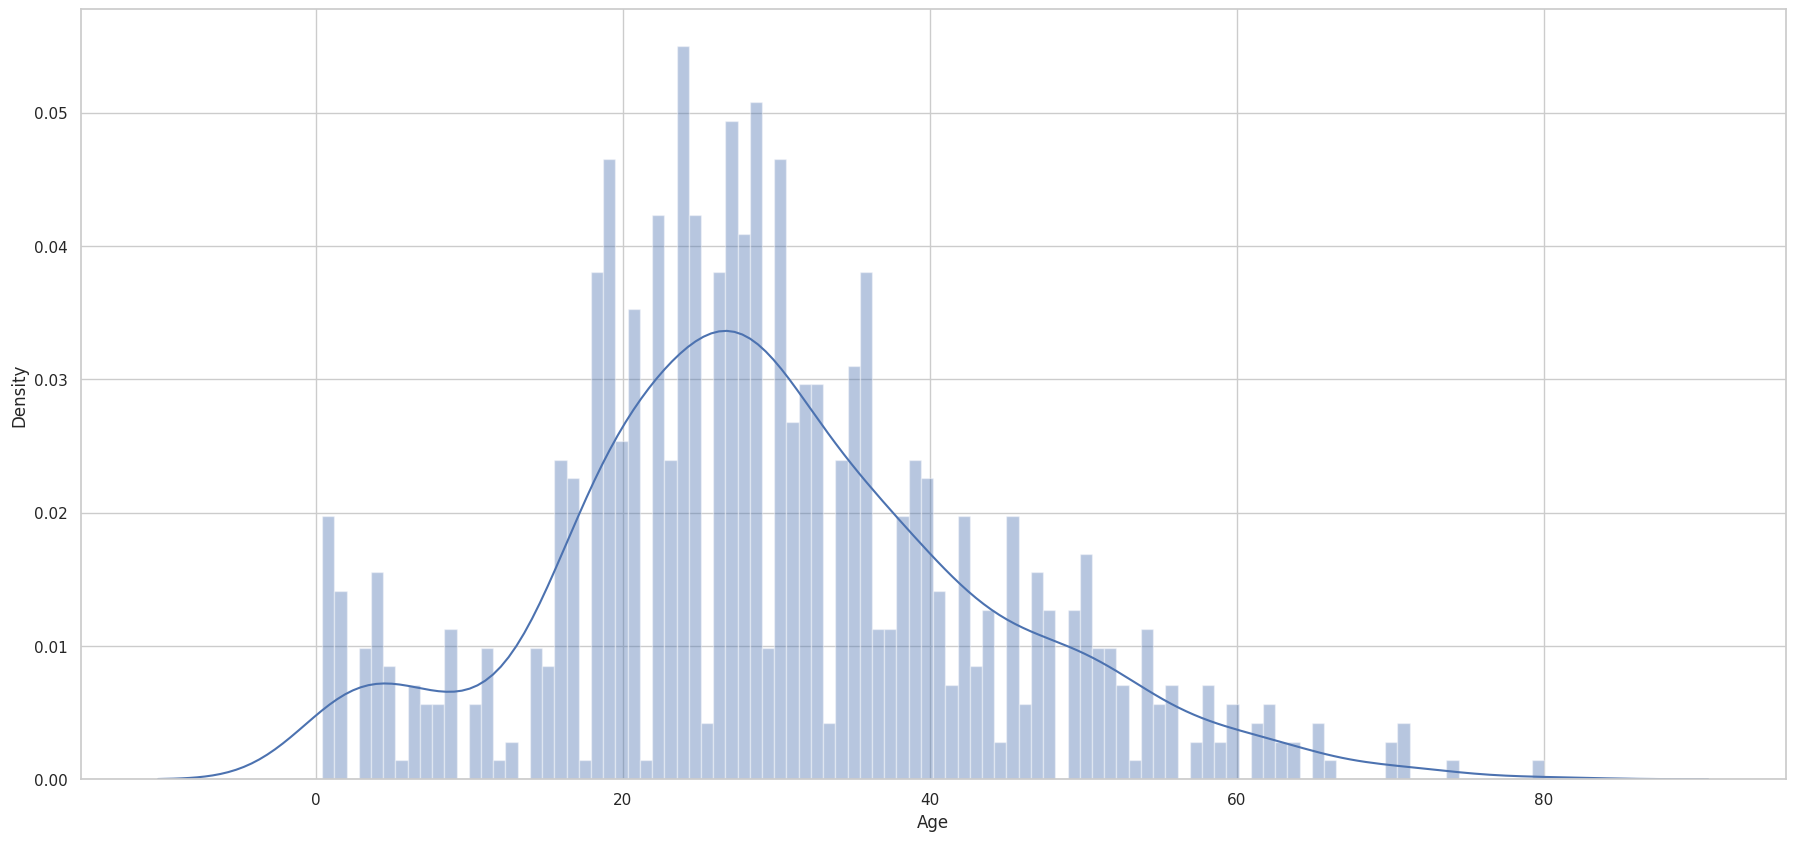

In [ ]:
plt.subplots(figsize = (22,10),)
sns.distplot(train.Age, bins = 100, kde = True, rug = False, norm_hist=False);

In [ ]:
def age_group_fun(age):
    a = ''
    if age <= 1:
        a = 'infant'
    elif age <= 4:
        a = 'toddler'
    elif age <= 13:
        a = 'child'
    elif age <= 18:
        a = 'teenager'
    elif age <= 35:
        a = 'Young_Adult'
    elif age <= 45:
        a = 'adult'
    elif age <= 55:
        a = 'middle_aged'
    elif age <= 65:
        a = 'senior_citizen'
    else:
        a = 'old'
    return a

train['age_group'] = train['Age'].map(age_group_fun)
test['age_group'] = test['Age'].map(age_group_fun)

train = pd.get_dummies(train,columns=['age_group'], drop_first=True)
test = pd.get_dummies(test,columns=['age_group'], drop_first=True);

In [ ]:
'''
어떤 머신 러닝 모델을 적용하기 전에 종속 변수와 독립 변수를 구분하는 것이 중요하다.
현재 Data set의 종속변수가 없기 때문에 학습 모델을 사용해서 예측한다.
'''
X = train.drop(['Survived'], axis = 1)
y = train["Survived"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .33, random_state=0)

In [ ]:
len(X_train)

596

In [ ]:
len(X_test)

295

In [ ]:
train.sample(5)

,Survived,Age,Sex,SibSp,Parch,is_alone,calculated_fare,title_Master,title_Miss,title_Mr,...,fare_group_mid,fare_group_very_high,age_group_adult,age_group_child,age_group_infant,age_group_middle_aged,age_group_old,age_group_senior_citizen,age_group_teenager,age_group_toddler
772,0,57.000000,0,0,0,1,10.500000,0,0,0,...,1,0,0,0,0,0,0,1,0,0
153,0,40.500000,1,0,2,0,4.833333,0,0,1,...,0,0,1,0,0,0,0,0,0,0
425,0,28.845826,1,0,0,1,7.250000,0,0,1,...,0,0,0,0,0,0,0,0,0,0
567,0,29.000000,0,0,4,0,4.215000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
613,0,52.203733,1,0,0,1,7.750000,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
headers = X_train.columns

X_train.head()

,Age,Sex,SibSp,Parch,is_alone,calculated_fare,title_Master,title_Miss,title_Mr,title_Mrs,...,fare_group_mid,fare_group_very_high,age_group_adult,age_group_child,age_group_infant,age_group_middle_aged,age_group_old,age_group_senior_citizen,age_group_teenager,age_group_toddler
242,29.0,1,0,0,1,10.50,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
344,36.0,1,0,0,1,13.00,0,0,1,0,...,1,0,1,0,0,0,0,0,0,0
170,61.0,1,0,0,1,33.50,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
187,45.0,1,0,0,1,26.55,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
800,34.0,1,0,0,1,13.00,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
'''
타이타닉에서 연령과 평균적인 금액은 머신 러닝 학습에 비해 비중이 훨씬 높은 것을 알 수 있다.
이 높은 데이터가 기계에게는 가중치가 높기 때문에 학습에는 혼란을 야기할 수 있으니 더 나은 결과를 내기 위해서는
현재의 기능을 스케일링 하는 것이 중요하다.
'''

from sklearn.preprocessing import StandardScaler
st_scale = StandardScaler()

X_train = st_scale.fit_transform(X_train)

X_test = st_scale.transform(X_test)

In [ ]:
pd.DataFrame(X_train, columns=headers).head()

,Age,Sex,SibSp,Parch,is_alone,calculated_fare,title_Master,title_Miss,title_Mr,title_Mrs,...,fare_group_mid,fare_group_very_high,age_group_adult,age_group_child,age_group_infant,age_group_middle_aged,age_group_old,age_group_senior_citizen,age_group_teenager,age_group_toddler
0,-0.051546,0.724083,-0.455235,-0.469509,0.803996,-0.281753,-0.226156,-0.499476,0.832575,-0.405046,...,2.162450,-0.305905,-0.475749,-0.230225,-0.123823,-0.295958,-0.09198,-0.200349,-0.285779,-0.191107
1,0.455252,0.724083,-0.455235,-0.469509,0.803996,-0.209699,-0.226156,-0.499476,0.832575,-0.405046,...,2.162450,-0.305905,2.101947,-0.230225,-0.123823,-0.295958,-0.09198,-0.200349,-0.285779,-0.191107
2,2.265247,0.724083,-0.455235,-0.469509,0.803996,0.381139,-0.226156,-0.499476,0.832575,-0.405046,...,-0.462438,-0.305905,-0.475749,-0.230225,-0.123823,-0.295958,-0.09198,4.991297,-0.285779,-0.191107
3,1.106850,0.724083,-0.455235,-0.469509,0.803996,0.180831,-0.226156,-0.499476,0.832575,-0.405046,...,-0.462438,-0.305905,2.101947,-0.230225,-0.123823,-0.295958,-0.09198,-0.200349,-0.285779,-0.191107
4,0.310453,0.724083,-0.455235,-0.469509,0.803996,-0.209699,-0.226156,-0.499476,0.832575,-0.405046,...,2.162450,-0.305905,-0.475749,-0.230225,-0.123823,-0.295958,-0.09198,-0.200349,-0.285779,-0.191107


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, accuracy_score

logreg = LogisticRegression(solver='liblinear',
                            penalty= 'l1',random_state = 42
                            )

logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_test)

In [ ]:
'''
혼동 행렬은 분류 모델의 성능을 설명합니다. 관심 범주에 따라 어떤 부분을 더 잘 예측하는 지 의도에 달렸다.
TP / TN의 숫자가 높을 수록 좋은 모델이지만 관심 부분에 따라 다르다.
'''
from sklearn.metrics import classification_report, confusion_matrix

pd.DataFrame(confusion_matrix(y_test,y_pred),\
            columns=["Predicted Not-Survived", "Predicted Survived"],\
            index=["Not-Survived","Survived"] )

,Predicted Not-Survived,Predicted Survived
Not-Survived,156,28
Survived,25,86


In [ ]:
'''
예측 모형의 전체적인 정확도를 평가
예를 들어 생존못한 고객을 생존 못했다 표기하고 살아남았다하면 살아남았다고 표기할 경우
156 + 85 / 156 + 28 + 26 + 85 = 0.8169~
'''

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8203389830508474

In [ ]:
'''
예측 모델이 실제 데이터에서 존재하는 살아남은 못한 고객(관심 범주라 할 때) 몇 명이 살아남았다고 예측했는 지 나타내는 수치이다.
85 / 85 + 26 = 0.76~
'''
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.7747747747747747

In [ ]:
'''
예측의 질에 대한 수치이다.
85 / 85 + 28 = 0.75~
'''
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.7543859649122807

In [ ]:
from sklearn.metrics import classification_report, balanced_accuracy_score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85       184
           1       0.75      0.77      0.76       111

    accuracy                           0.82       295
   macro avg       0.81      0.81      0.81       295
weighted avg       0.82      0.82      0.82       295



Confusion matrix, without normalization
[[156  28]
 [ 25  86]]
Normalized confusion matrix
[[0.85 0.15]
 [0.23 0.77]]


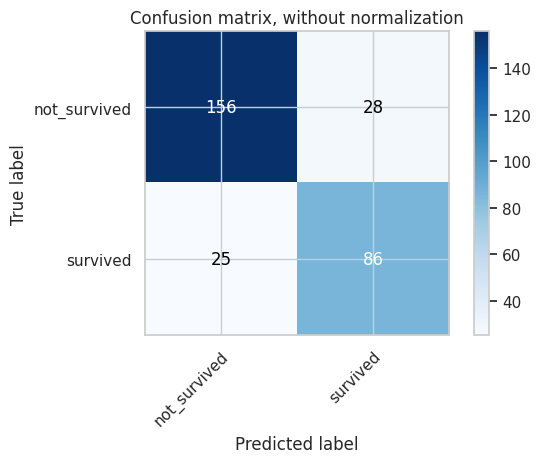

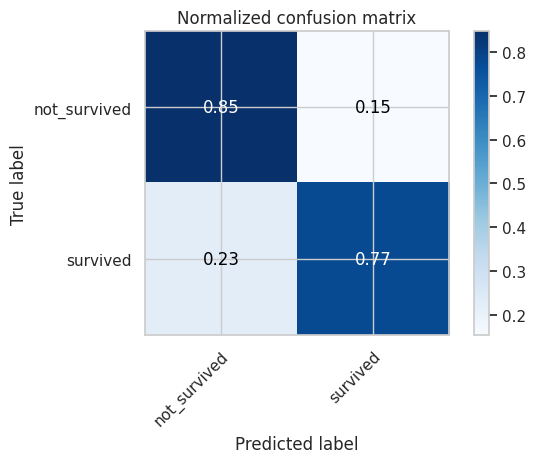

In [ ]:
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    혼동 행렬을 정규화 하는데 사용하는 함수
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    cm = confusion_matrix(y_true, y_pred)

    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)

    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

class_names = np.array(['not_survived','survived'])

plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

0.8707403055229141


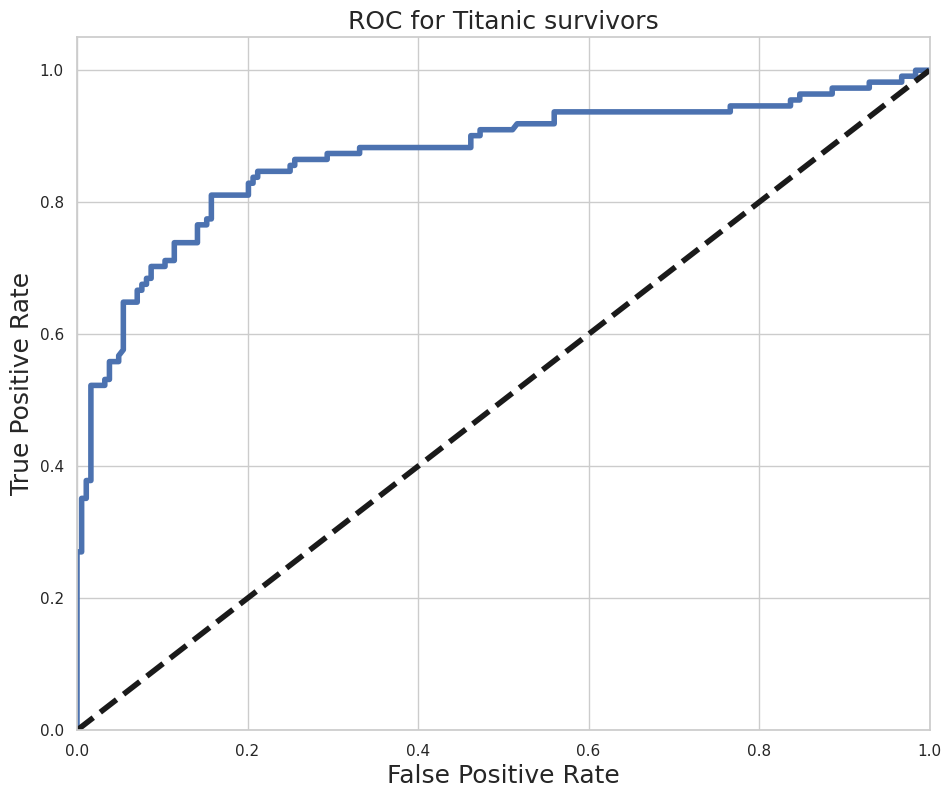

In [ ]:
'''
ROC는 두 클래스 모형에서 여러 절댄값에서의 민감도와 특이도의 관계를 말한다.
'''

from sklearn.metrics import roc_curve, auc

y_score = logreg.decision_function(X_test)

FPR, TPR, _ = roc_curve(y_test, y_score)
ROC_AUC = auc(FPR, TPR)
print (ROC_AUC)

plt.figure(figsize =[11,9])
plt.plot(FPR, TPR, label= 'ROC curve(area = %0.2f)'%ROC_AUC, linewidth= 4)
plt.plot([0,1],[0,1], 'k--', linewidth = 4)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate', fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.title('ROC for Titanic survivors', fontsize= 18)
plt.show()

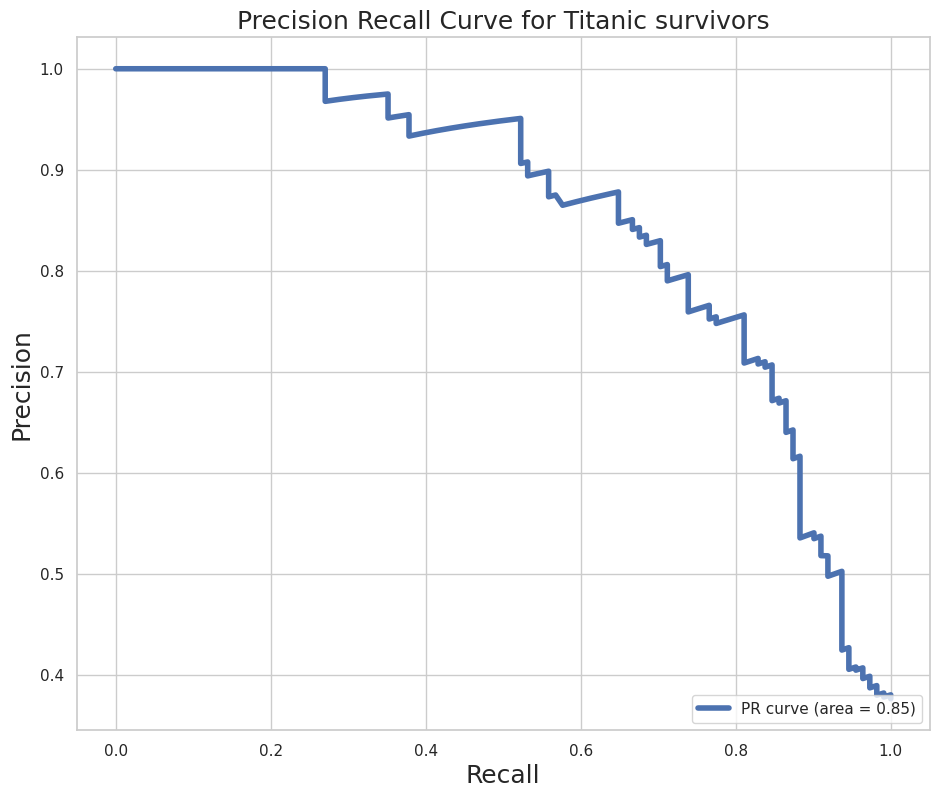

In [ ]:
from sklearn.metrics import precision_recall_curve

y_score = logreg.decision_function(X_test)

precision, recall, _ = precision_recall_curve(y_test, y_score)
PR_AUC = auc(recall, precision)

plt.figure(figsize=[11,9])
plt.plot(recall, precision, label='PR curve (area = %0.2f)' % PR_AUC, linewidth=4)
plt.xlabel('Recall', fontsize=18)
plt.ylabel('Precision', fontsize=18)
plt.title('Precision Recall Curve for Titanic survivors', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [ ]:
'''
교차검증
위와 같이 우리는 label이 있는 train, test 셋으로 구성했다. 만약에 train set을 validation으로 까지 분리시키지 않는다고 하면
우리는 test set을 모델 검증을 하기 위해 사용해야 할 것이다. 여기에 한 가지 약점이 존재한다면 고정된 test set을 가지고 모델의 성능을 확인하고
파라미터를 수정하고, 이 과정이 점점 반복된다면 결국 내가 만든 모델은 test set에만 잘 작동되는 모델이 된다. 그 경우
test set에 과적합되어 다른 실제 데이터를 가지고 진행하게 되낟면 엉망인 결과가 나타나게 된다.
'''

'\n교차검증\n위와 같이 우리는 label이 있는 train, test 셋으로 구성했다. 만약에 train set을 validation으로 까지 분리시키지 않는다고 하면\n우리는 test set을 모델 검증을 하기 위해 사용해야 할 것이다. 여기에 한 가지 약점이 존재한다면 고정된 test set을 가지고 모델의 성능을 확인하고\n파라미터를 수정하고, 이 과정이 점점 반복된다면 결국 내가 만든 모델은 test set에만 잘 작동되는 모델이 된다. 그 경우\ntest set에 과적합되어 다른 실제 데이터를 가지고 진행하게 되낟면 엉망인 결과가 나타나게 된다.\n'

In [ ]:
sc = st_scale

In [ ]:
'''
이번에 사용하게 될 계층별 k-겹 교차 검증은 주로 분류 문제에서 사용하게 되며 label의 분포가 각 클래스별로 불균형을 이룰 때
유용하게 사용된다. 우리의 같은 경우 나이 또한 어린 연령에 치우쳐있고 성별 또한 여성에 많이 기울여있다보니 데이터를 검증하는데 치명적인 오류를 야기하는 걸 방지하기 위해
이 검증을 사용하게 된다.
'''

from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score

# n_splits = k겹 교차검증을 몇 번 수행 할 것인가를 지정하는 것으로 기본 값은 5이다.
# random_state = 여러 번 실행해도 폴드가 바뀌지 않아 결과값을 유지할 수 있다.
cv = StratifiedShuffleSplit(n_splits = 10, test_size = .25, random_state = 0)

column_names = X.columns

X = sc.fit_transform(X)
accuracies = cross_val_score(LogisticRegression(solver='liblinear'), X, y, cv = cv)
print ("Cross-Validation accuracy scores:{}".format(accuracies))
print ("Mean Cross-Validation accuracy score: {}".format(round(accuracies.mean(),5)))

Cross-Validation accuracy scores:[0.8  0.81 0.82 0.87 0.82 0.82 0.83 0.87 0.81 0.82]
Mean Cross-Validation accuracy score: 0.82601


In [ ]:
'''
GridSearchCV란 매개변수 튜닝을 통해 모델의 성능을 높임을 말한다.
'''

from sklearn.model_selection import GridSearchCV, StratifiedKFold
# C_vals 은 라쏘, 회귀 분석의 알파값이다.
C_vals = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,16.5,17,17.5,18]
# penalties(Lasso(l1) 또는 Ridge(l2))
penalties = ['l1','l2']

cv = StratifiedShuffleSplit(n_splits = 10, test_size = .25)

param = {'penalty': penalties, 'C': C_vals}

logreg = LogisticRegression(solver='liblinear')

grid = GridSearchCV(estimator=LogisticRegression(),
                          param_grid = param,
                          scoring = 'accuracy',
                          n_jobs =-1,
                          cv = cv
                          )

grid.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
270 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: So

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=None, test_size=0.25,
            train_size=None),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3,
                               4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 16.5,
                               17, 17.5, 18],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [ ]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.8255605381165921
{'C': 0.2, 'penalty': 'l2'}
LogisticRegression(C=0.2)


In [ ]:
logreg_grid = grid.best_estimator_
logreg_grid.score(X,y)

0.8372615039281706

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# metric의 minkowski는 유클리드 거리와 맨하튼 거리를 일반화 한 것을 말한다.
# p=1은 맨하튼 거리 / p=2는 유클리드 거리
knn = KNeighborsClassifier(metric='minkowski', p=2)

cv = StratifiedShuffleSplit(n_splits=10, test_size=.25, random_state=2)

accuracies = cross_val_score(knn, X,y, cv = cv, scoring='accuracy')
print ("Cross-Validation accuracy scores:{}".format(accuracies))
print ("Mean Cross-Validation accuracy score: {}".format(round(accuracies.mean(),3)))

Cross-Validation accuracy scores:[0.78 0.77 0.8  0.81 0.81 0.78 0.78 0.82 0.78 0.82]
Mean Cross-Validation accuracy score: 0.794


In [ ]:
k_range = range(1,31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X,y, cv = cv, scoring = 'accuracy')
    k_scores.append(scores.mean())
print("Accuracy scores are: {}\n".format(k_scores))
print ("Mean accuracy score: {}".format(np.mean(k_scores)))

Accuracy scores are: [0.7426008968609865, 0.7650224215246636, 0.7856502242152467, 0.7932735426008969, 0.794170403587444, 0.7995515695067266, 0.7959641255605382, 0.7914798206278026, 0.7986547085201794, 0.7946188340807175, 0.795067264573991, 0.7878923766816144, 0.7923766816143496, 0.7838565022421525, 0.7878923766816144, 0.7825112107623319, 0.7860986547085203, 0.7869955156950673, 0.7928251121076233, 0.7816143497757847, 0.7869955156950674, 0.7798206278026907, 0.7852017937219731, 0.7789237668161435, 0.7811659192825113, 0.7659192825112108, 0.7730941704035874, 0.7681614349775785, 0.7717488789237668, 0.766816143497758]

Mean accuracy score: 0.7831988041853511


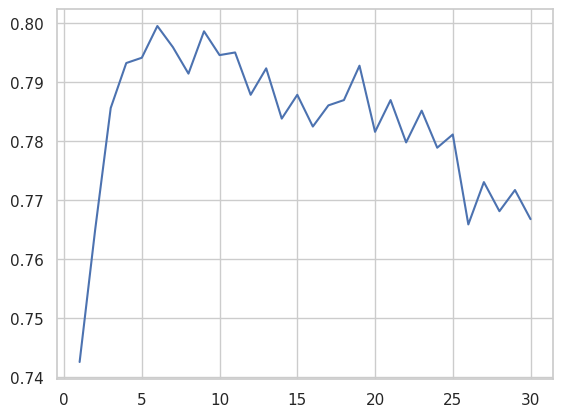

In [ ]:
from matplotlib import pyplot as plt

plt.plot(k_range, k_scores)

In [ ]:
from sklearn.model_selection import GridSearchCV

k_range = range(1,31)

weights_options=['uniform','distance']

param = {'n_neighbors':k_range, 'weights':weights_options}

cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)

grid = GridSearchCV(KNeighborsClassifier(), param, cv=cv ,verbose = False, n_jobs=-1)

grid.fit(X,y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 31),
                         'weights': ['uniform', 'distance']},
             verbose=False)

In [ ]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.8063432835820894
{'n_neighbors': 8, 'weights': 'uniform'}
KNeighborsClassifier(n_neighbors=8)


In [ ]:
knn_grid= grid.best_estimator_
knn_grid.score(X,y)

0.8451178451178452

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

k_range = range(1,31)

weights_options=['uniform','distance']

param = {'n_neighbors':k_range, 'weights':weights_options}

cv = StratifiedShuffleSplit(n_splits=10, test_size=.30)

grid = RandomizedSearchCV(KNeighborsClassifier(), param,cv=cv,verbose = False, n_jobs=-1, n_iter=40)

grid.fit(X,y)

RandomizedSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=None, test_size=0.3,
            train_size=None),
                   estimator=KNeighborsClassifier(), n_iter=40, n_jobs=-1,
                   param_distributions={'n_neighbors': range(1, 31),
                                        'weights': ['uniform', 'distance']},
                   verbose=False)

In [ ]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.7932835820895522
{'weights': 'uniform', 'n_neighbors': 5}
KNeighborsClassifier()


In [ ]:
knn_ran_grid = grid.best_estimator_
knn_ran_grid.score(X, y)

0.8641975308641975

In [ ]:
# 가우시안 나이브 베이즈 기법
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(X, y)
y_pred = gaussian.predict(X_test)
gaussian_accy = round(accuracy_score(y_pred, y_test), 3)
print(gaussian_accy)

0.81


In [ ]:
# 서포트 벡터 머신
from sklearn.svm import SVC

Cs = [0.001, 0.01, 0.1, 1,1.5,2,2.5,3,4,5, 10]
gammas = [0.0001,0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)
grid_search = GridSearchCV(SVC(kernel = 'rbf', probability=True), param_grid, cv=cv)
grid_search.fit(X,y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             estimator=SVC(probability=True),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 1.5, 2, 2.5, 3, 4, 5, 10],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1]})

In [ ]:
print(grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

0.8365671641791044
{'C': 1, 'gamma': 0.01}
SVC(C=1, gamma=0.01, probability=True)


In [ ]:
svm_grid = grid_search.best_estimator_
svm_grid.score(X,y)

0.8372615039281706

In [ ]:
from sklearn.tree import DecisionTreeClassifier

max_depth = range(1,30)
max_feature = [21,22,23,24,25,26,28,29,30,'auto']
criterion=["entropy", "gini"]

param = {'max_depth':max_depth,
         'max_features':max_feature,
         'criterion': criterion}

grid = GridSearchCV(DecisionTreeClassifier(),
                                param_grid = param,
                                 verbose=False,
                                 cv=StratifiedKFold(n_splits=20, random_state=15, shuffle=True),
                                n_jobs = -1)
grid.fit(X, y)

GridSearchCV(cv=StratifiedKFold(n_splits=20, random_state=15, shuffle=True),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 30),
                         'max_features': [21, 22, 23, 24, 25, 26, 28, 29, 30,
                                          'auto']},
             verbose=False)

In [ ]:
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_estimator_)

{'criterion': 'entropy', 'max_depth': 4, 'max_features': 22}
0.831868686868687
DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=22)


In [ ]:
dectree_grid = grid.best_estimator_
dectree_grid.score(X,y)

0.8428731762065096

In [ ]:
feature_importances = pd.DataFrame(dectree_grid.feature_importances_,
                                   index = column_names,
                                    columns=['importance'])
feature_importances.sort_values(by='importance', ascending=False).head(10)

,importance
title_Mr,0.519168
Pclass_3,0.135150
calculated_fare,0.115288
title_rare,0.085805
family_group_large,0.079538
Pclass_2,0.016703
age_group_infant,0.010915
Parch,0.010744
Cabin_D,0.010639
fare_group_very_high,0.008957


In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier

n_estimators = [140,145,150,155,160];
max_depth = range(1,10);
criterions = ['gini', 'entropy'];
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)

parameters = {'n_estimators':n_estimators,
              'max_depth':max_depth,
              'criterion': criterions}

grid = GridSearchCV(estimator=RandomForestClassifier(max_features='auto'),
                                 param_grid=parameters,
                                 cv=cv,
                                 n_jobs = -1)
grid.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             estimator=RandomForestClassifier(max_features='auto'), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'n_estimators': [140, 145, 150, 155, 160]})

In [ ]:
print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

0.8406716417910449
{'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 155}
RandomForestClassifier(criterion='entropy', max_depth=5, max_features='auto',
                       n_estimators=155)


In [ ]:
rf_grid = grid.best_estimator_
rf_grid.score(X,y)

0.8451178451178452

In [ ]:
feature_importances = pd.DataFrame(rf_grid.feature_importances_,
                                   index = column_names,
                                    columns=['importance'])
feature_importances.sort_values(by='importance', ascending=False).head(10)

,importance
title_Mr,0.182950
Sex,0.163263
title_Miss,0.070116
calculated_fare,0.068141
Pclass_3,0.067314
title_Mrs,0.057437
Age,0.046753
Pclass_1,0.034262
family_group_small,0.030670
Cabin_G,0.025387


In [ ]:
from sklearn.ensemble import BaggingClassifier

n_estimators = [10,30,50,70,80,150,160, 170,175,180,185];
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)

parameters = {'n_estimators':n_estimators,

        }
grid = GridSearchCV(BaggingClassifier(base_estimator= None,
                                      bootstrap_features=False),
                                      param_grid=parameters,
                                      cv=cv,
                                      n_jobs = -1)
grid.fit(X,y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             estimator=BaggingClassifier(base_estimator=None), n_jobs=-1,
             param_grid={'n_estimators': [10, 30, 50, 70, 80, 150, 160, 170,
                                          175, 180, 185]})

In [ ]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.8186567164179104
{'n_estimators': 150}
BaggingClassifier(base_estimator=None, n_estimators=150)


In [ ]:
bagging_grid = grid.best_estimator_
bagging_grid.score(X,y)

0.9887766554433222

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

n_estimators = [100, 140, 145, 150, 160, 170, 175, 180, 185];
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)
learning_r = [0.1, 1, 0.01, 0.5]

parameters = {'n_estimators':n_estimators,
              'learning_rate':learning_r

        }
grid = GridSearchCV(AdaBoostClassifier(base_estimator= None,
                                     ),
                                 param_grid=parameters,
                                 cv=cv,
                                 n_jobs = -1)
grid.fit(X, y)

ValueError: ignored

In [ ]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

In [ ]:
adaBoost_grid = grid.best_estimator_
adaBoost_grid.score(X,y)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gradient_boost = GradientBoostingClassifier()
gradient_boost.fit(X, y)
y_pred = gradient_boost.predict(X_test)
gradient_accy = round(accuracy_score(y_pred, y_test), 3)

print(gradient_accy)

0.871


In [ ]:
from xgboost import XGBClassifier

XGBClassifier = XGBClassifier()
XGBClassifier.fit(X, y)
y_pred = XGBClassifier.predict(X_test)
XGBClassifier_accy = round(accuracy_score(y_pred, y_test), 3)

print(XGBClassifier_accy)

0.939


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
ExtraTreesClassifier = ExtraTreesClassifier()
ExtraTreesClassifier.fit(X, y)
y_pred = ExtraTreesClassifier.predict(X_test)
extraTree_accy = round(accuracy_score(y_pred, y_test), 3)

print(extraTree_accy)

0.956


In [ ]:
from sklearn.gaussian_process import GaussianProcessClassifier

GaussianProcessClassifier = GaussianProcessClassifier()
GaussianProcessClassifier.fit(X, y)
y_pred = GaussianProcessClassifier.predict(X_test)
gau_pro_accy = round(accuracy_score(y_pred, y_test), 3)

print(gau_pro_accy)

0.946


In [ ]:
from sklearn.ensemble import VotingClassifier

voting_classifier = VotingClassifier(estimators=[
    ('lr_grid', logreg_grid),
    ('svc', svm_grid),
    ('random_forest', rf_grid),
    ('gradient_boosting', gradient_boost),
    ('decision_tree_grid',dectree_grid),
    ('knn_classifier', knn_grid),
    ('XGB_Classifier', XGBClassifier),
    ('bagging_classifier', bagging_grid),
    # ('adaBoost_classifier',adaBoost_grid),
    ('ExtraTrees_Classifier', ExtraTreesClassifier),
    ('gaussian_classifier',gaussian),
    ('gaussian_process_classifier', GaussianProcessClassifier)
],voting='hard')

# voting_classifier = voting_classifier.fit(train_x,train_y)
voting_classifier = voting_classifier.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [ ]:
y_pred = voting_classifier.predict(X_test)
voting_accy = round(accuracy_score(y_pred, y_test), 3)
print(voting_accy)

0.898


In [ ]:
all_models = [logreg_grid,
              knn_grid,
              knn_ran_grid,
              svm_grid,
              dectree_grid,
              rf_grid,
              bagging_grid,
              # adaBoost_grid,
              voting_classifier]

c = {}
for i in all_models:
    a = i.predict(X_test)
    b = accuracy_score(a, y_test)
    c[i] = b

In [ ]:
test_prediction = (max(c, key=c.get)).predict(test)
submission = pd.DataFrame({
        "Survived": test_prediction
    })

# submission.PassengerId = submission.PassengerId.astype(int)
submission.Survived = submission.Survived.astype(int)

submission.to_csv("titanic1_submission.csv", index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but BaggingClassifier was fitted without feature names
  warnings.warn(
